In [182]:
import pandas as pd
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random

In [183]:
def generate_dataset(n_clusters: int, n_points: int = 100, std: float = 1.0, min: float = -10, max: float = 10, random_state : int = None):
    """
    generates a two dimensional set of points
    :param n_clusters: number of clusters to generate
    :param n_points: number of total points to generate for all clusters
    :param std: standard deviation of cluster points
    :param min: minimum point value
    :param max: maximum point value
    :param random_state: random generator seed
    :return: X, array of points shape (n_points, 2)
    :return: y, array of point cluster identity
    :return: centers, center point for each cluster
    """
    X, y, centers = make_blobs(n_samples=n_points, n_features=2, centers=n_clusters, cluster_std=std, center_box=(min, max), return_centers=True, random_state=random_state)
    return X, y, centers

In [176]:
"""
Requirements:
the input plot must without axes
"""
def generate_save_plot(n_clusters, n_points, std, random_state, plot_path, show=True):
    X, y, centers = generate_dataset(
        n_clusters = n_clusters, 
        n_points = n_points,
        std = std,
        random_state = random_state
    )
    plt.scatter(X[:, 0], X[:, 1])
    plt.axis('off') # to save plot without axes
    plt.savefig(plot_path)
    if show: plt.show()
    plt.clf()
        
def get_binary_plot(path):
    plot = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    bp = plot
    bp[plot == 255] = 0;
    bp[plot>0] = 255;
    return bp

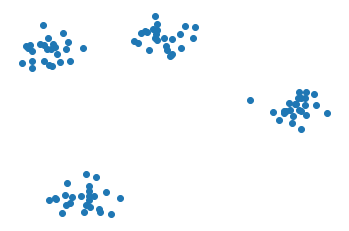

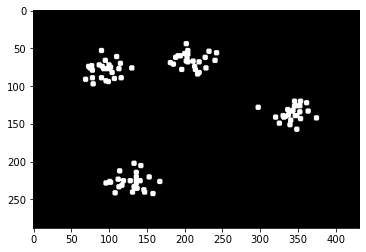

In [180]:
generate_save_plot(4, 100, 1.0, 42, '../plots/test.png')
binary_plot = get_binary_plot('../plots/test.png')
plt.imshow(binary_plot, cmap='gray')

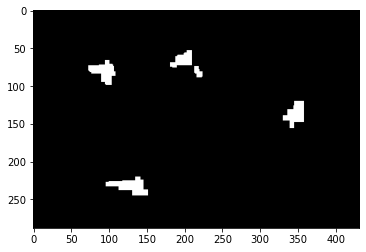

In [181]:
s1=(6,6)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, s1)
morph1 = cv2.morphologyEx(binary_plot, cv2.MORPH_OPEN, kernel)

s2 = (20,20)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, s2)
morph2 = cv2.morphologyEx(morph1, cv2.MORPH_CLOSE, kernel)

# kernel = np.ones((n,n), np.uint8)
# img_dilation = cv2.dilate(binary_plot, kernel, iterations=1)
plt.imshow(morph2, cmap='gray')